In [4]:
#loading packages and libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [12]:
dataset = pd.read_csv('E:/heart.csv')
dataset.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [13]:
dataset.shape 


(1025, 14)

In [14]:
#detect missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='age'>

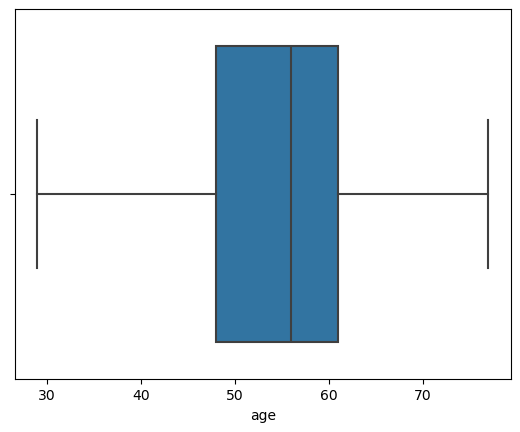

In [15]:
import seaborn as sns
sns.boxplot(data=dataset,x=dataset["age"])

<Axes: xlabel='trestbps'>

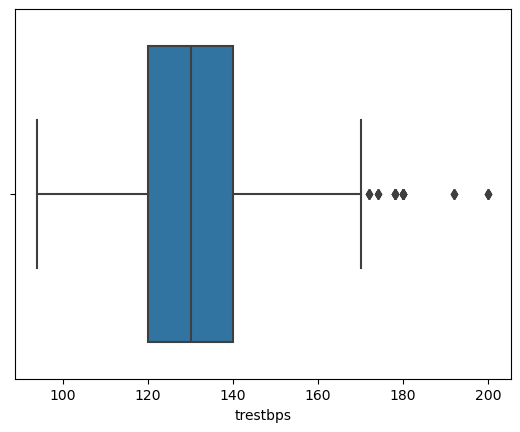

In [16]:
sns.boxplot(data=dataset,x=dataset["trestbps"])


<Axes: xlabel='chol'>

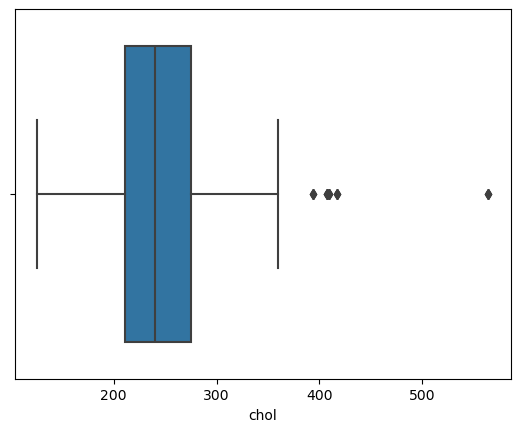

In [17]:
sns.boxplot(data=dataset,x=dataset["chol"])


<Axes: xlabel='thalach'>

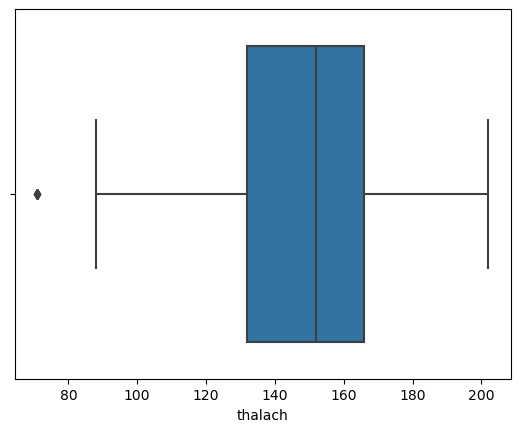

In [18]:
sns.boxplot(data=dataset,x=dataset["thalach"])


<Axes: xlabel='oldpeak'>

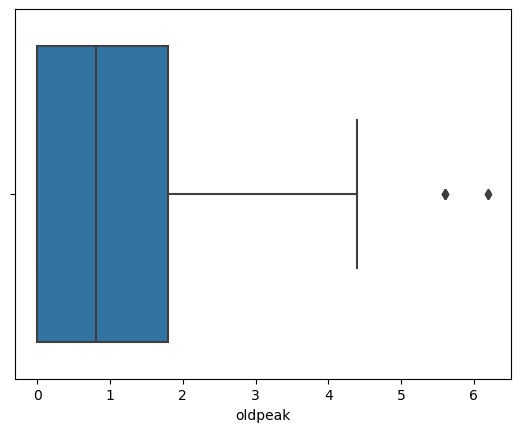

In [19]:
sns.boxplot(data=dataset,x=dataset["oldpeak"])


In [20]:
dataset.describe() 


age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [21]:
#print min and max of acceptable range 
maxtrest = 140 + (1.5)*(140-120) 
print("Max of accpetable range of trestbps: ",maxtrest)
mintrest = 120 - (1.5)*(140-120)
print("Min of acceptable range of trestbps: ",mintrest) 
maxchol = 275 + (1.5)*(275-211) 
print("Max of accpetable range of chol: ",maxchol)
minchol = 211 - (1.5)*(275-211)
print("Min of acceptable range of chol: ",minchol) 
maxthal = 166 + (1.5)*(166-133) 
print("Max of accpetable range of thalach: ",maxthal)
minthal = 133 - (1.5)*(166-133)
print("Min of acceptable range of thalach: ",minthal) 
maxpeak = 1.6+ (1.5)*(1.6-0) 
print("Max of accpetable range of oldpeak: ",maxpeak)
minpeak = 0 - (1.5)*(1.6-0)
print("Min of acceptable range of oldpeak: ",minpeak) 

#since thalach is integer attribute  
minthal = 84 #rounded to integer 
maxthal = 216 #rounded to integer 

Max of accpetable range of trestbps:  170.0
Min of acceptable range of trestbps:  90.0
Max of accpetable range of chol:  371.0
Min of acceptable range of chol:  115.0
Max of accpetable range of thalach:  215.5
Min of acceptable range of thalach:  83.5
Max of accpetable range of oldpeak:  4.0
Min of acceptable range of oldpeak:  -2.4000000000000004


In [22]:
#cap outliers with min and max of acceptable range 
for i in range(len(dataset["trestbps"])):
    if dataset["trestbps"][i] > maxtrest:
        dataset["trestbps"][i]= maxtrest 
    if dataset["trestbps"][i] < mintrest:
        dataset["trestbps"][i]= mintrest
for i in range(len(dataset["chol"])):
    if dataset["chol"][i] > maxchol:
        dataset["chol"][i]= maxchol 
    if dataset["chol"][i] < minchol:
        dataset["chol"][i]= minchol
for i in range(len(dataset["thalach"])):
    if dataset["thalach"][i] > maxthal:
        dataset["thalach"][i]= maxthal 
    if dataset["thalach"][i] < minthal:
        dataset["thalach"][i]= minthal 
for i in range(len(dataset["oldpeak"])):
    if dataset["oldpeak"][i] > maxpeak:
        dataset["oldpeak"][i]= maxpeak 
    if dataset["oldpeak"][i] < minpeak:
        dataset["oldpeak"][i]= minpeak 
dataset.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8492\2821365965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["trestbps"][i]= maxtrest
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8492\2821365965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["trestbps"][i]= maxtrest
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8492\2821365965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["trestbps"][i]= maxtrest
C

age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.260488   244.981463   
std       9.072290     0.460373     1.029641    16.532208    47.746162   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.164878     0.336585     1.056098   
std       0.356527     0.527878    22.847044     0.472772     1.124768   
min       0.000000     0.000000    84.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     4.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

<Axes: >

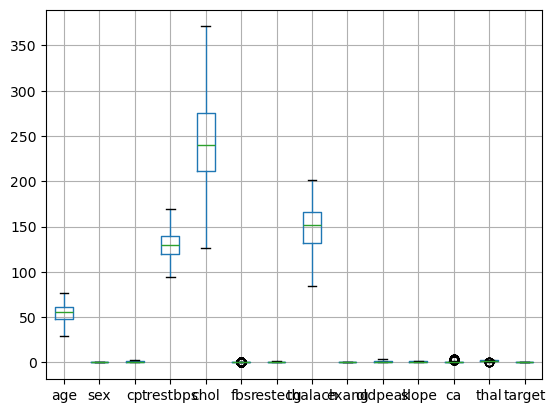

In [23]:
dataset.boxplot() 


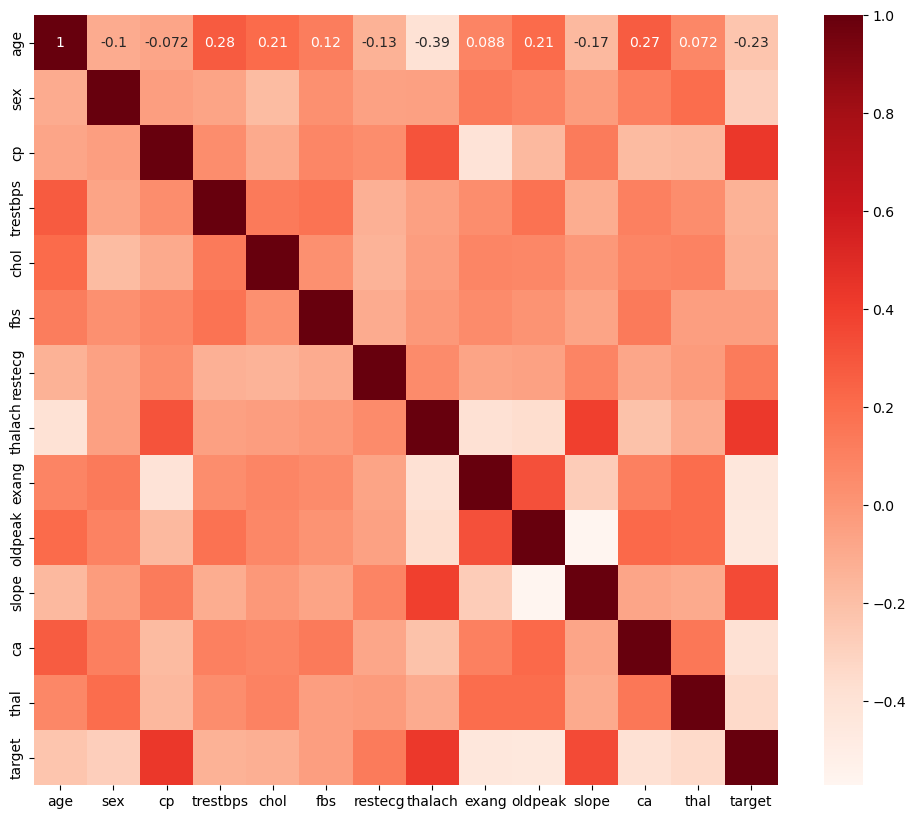

In [24]:
#correlation matrix 
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: title={'center': 'Correlation with Target'}>

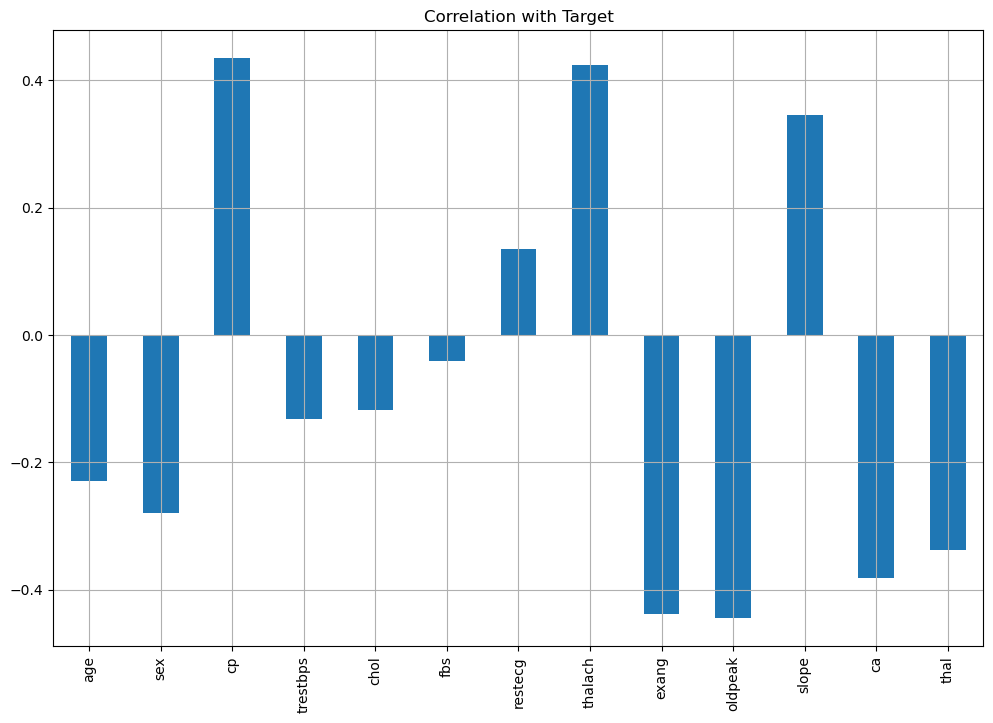

In [25]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind = 'bar', grid = True, 
                                                             figsize = (12, 8), 
                                                             title = "Correlation with Target")

In [26]:
#categorical variables to convert to dummy variables 
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        print(f"{column} : {dataset[column].unique()}")

sex : [1 0]
cp : [0 1 2 3]
fbs : [0 1]
restecg : [1 0 2]
exang : [0 1]
slope : [2 0 1]
ca : [2 0 1 3 4]
thal : [3 2 1 0]
target : [0 1]


In [27]:
#convert to dummy variables 
from pandas import get_dummies

a = pd.get_dummies(dataset['sex'], prefix = "sex")
b = pd.get_dummies(dataset['cp'], prefix = "cp")
c = pd.get_dummies(dataset['fbs'], prefix = "fbs")
d = pd.get_dummies(dataset['restecg'], prefix = "restecg")
e = pd.get_dummies(dataset['exang'], prefix = "exang")
f = pd.get_dummies(dataset['slope'], prefix = "slope")
g = pd.get_dummies(dataset['ca'], prefix = "ca")
h = pd.get_dummies(dataset['thal'], prefix = "thal")

#data frame with dummy variables 
frames = [dataset, a, b, c, d, e, f, g, h]

#combine dummy variables with dataset 
dataset2 = pd.concat(frames, axis = 1)

#drop categorical variabes as they are converted to dummy variables
dataset2 = dataset2.drop(columns = ['sex','cp', 'fbs', 'restecg',
                                  'exang','slope','ca','thal'])

dataset2.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0   cp_1  \
0   52       125   212      168      1.0       0  False   True  True  False   
1   53       140   203      155      3.1       0  False   True  True  False   
2   70       145   174      125      2.6       0  False   True  True  False   
3   61       148   203      161      0.0       0  False   True  True  False   
4   62       138   294      106      1.9       0   True  False  True  False   

   ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  thal_2  \
0  ...     True  False  False   True  False  False   False   False   False   
1  ...    False   True  False  False  False  False   False   False   False   
2  ...    False   True  False  False  False  False   False   False   False   
3  ...     True  False   True  False  False  False   False   False   False   
4  ...    False  False  False  False   True  False   False   False    True   

   thal_3  
0    True  
1    True  
2    True  
3    True  
4   False  

[5 rows x 31 columns]

In [28]:
type(dataset)

pandas.core.frame.DataFrame

In [29]:
dataset.shape

(1025, 14)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [31]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   trestbps   1025 non-null   int64  
 2   chol       1025 non-null   int64  
 3   thalach    1025 non-null   int64  
 4   oldpeak    1025 non-null   float64
 5   target     1025 non-null   int64  
 6   sex_0      1025 non-null   bool   
 7   sex_1      1025 non-null   bool   
 8   cp_0       1025 non-null   bool   
 9   cp_1       1025 non-null   bool   
 10  cp_2       1025 non-null   bool   
 11  cp_3       1025 non-null   bool   
 12  fbs_0      1025 non-null   bool   
 13  fbs_1      1025 non-null   bool   
 14  restecg_0  1025 non-null   bool   
 15  restecg_1  1025 non-null   bool   
 16  restecg_2  1025 non-null   bool   
 17  exang_0    1025 non-null   bool   
 18  exang_1    1025 non-null   bool   
 19  slope_0    1025 non-null   bool   
 20  slope_1 

In [32]:
pd.crosstab(index=dataset['sex'], columns='count') 

col_0  count
sex         
0        312
1        713

In [33]:
pd.crosstab(index=dataset['cp'], columns='count') 

col_0  count
cp          
0        497
1        167
2        284
3         77

In [34]:
pd.crosstab(index=dataset['fbs'], columns='count') 

col_0  count
fbs         
0        872
1        153

In [35]:
pd.crosstab(index=dataset['restecg'], columns='count') 

col_0    count
restecg       
0          497
1          513
2           15

In [36]:
pd.crosstab(index=dataset['exang'], columns='count') 

col_0  count
exang       
0        680
1        345

In [37]:
pd.crosstab(index=dataset['slope'], columns='count') 

col_0  count
slope       
0         74
1        482
2        469

In [38]:
pd.crosstab(index=dataset['ca'], columns='count') 

col_0  count
ca          
0        578
1        226
2        134
3         69
4         18

In [39]:
pd.crosstab(index=dataset['thal'], columns='count') 

col_0  count
thal        
0          7
1         64
2        544
3        410

In [40]:
pd.crosstab(index=dataset['target'], columns='count') 

col_0   count
target       
0         499
1         526

In [41]:
dataset['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

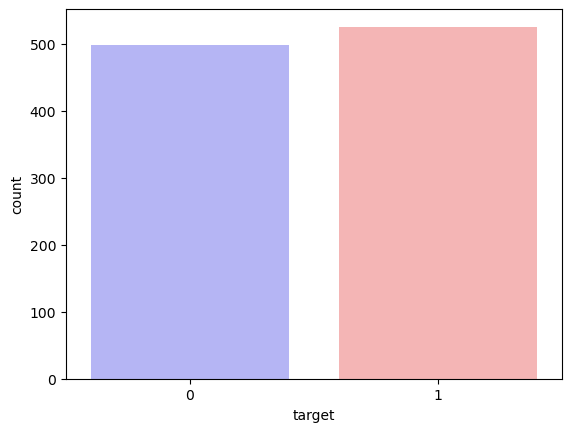

In [42]:
sns.countplot(x="target", data=dataset, palette="bwr")
plt.show()

In [43]:
dataset.describe() 

age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean     54.434146     0.695610     0.942439   131.260488   244.981463   
std       9.072290     0.460373     1.029641    16.532208    47.746162   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      48.000000     0.000000     0.000000   120.000000   211.000000   
50%      56.000000     1.000000     1.000000   130.000000   240.000000   
75%      61.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   170.000000   371.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.164878     0.336585     1.056098   
std       0.356527     0.527878    22.847044     0.472772     1.124768   
min       0.000000     0.000000    84.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     4.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [44]:
dataset.mode()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN

Text(0, 0.5, 'Target')

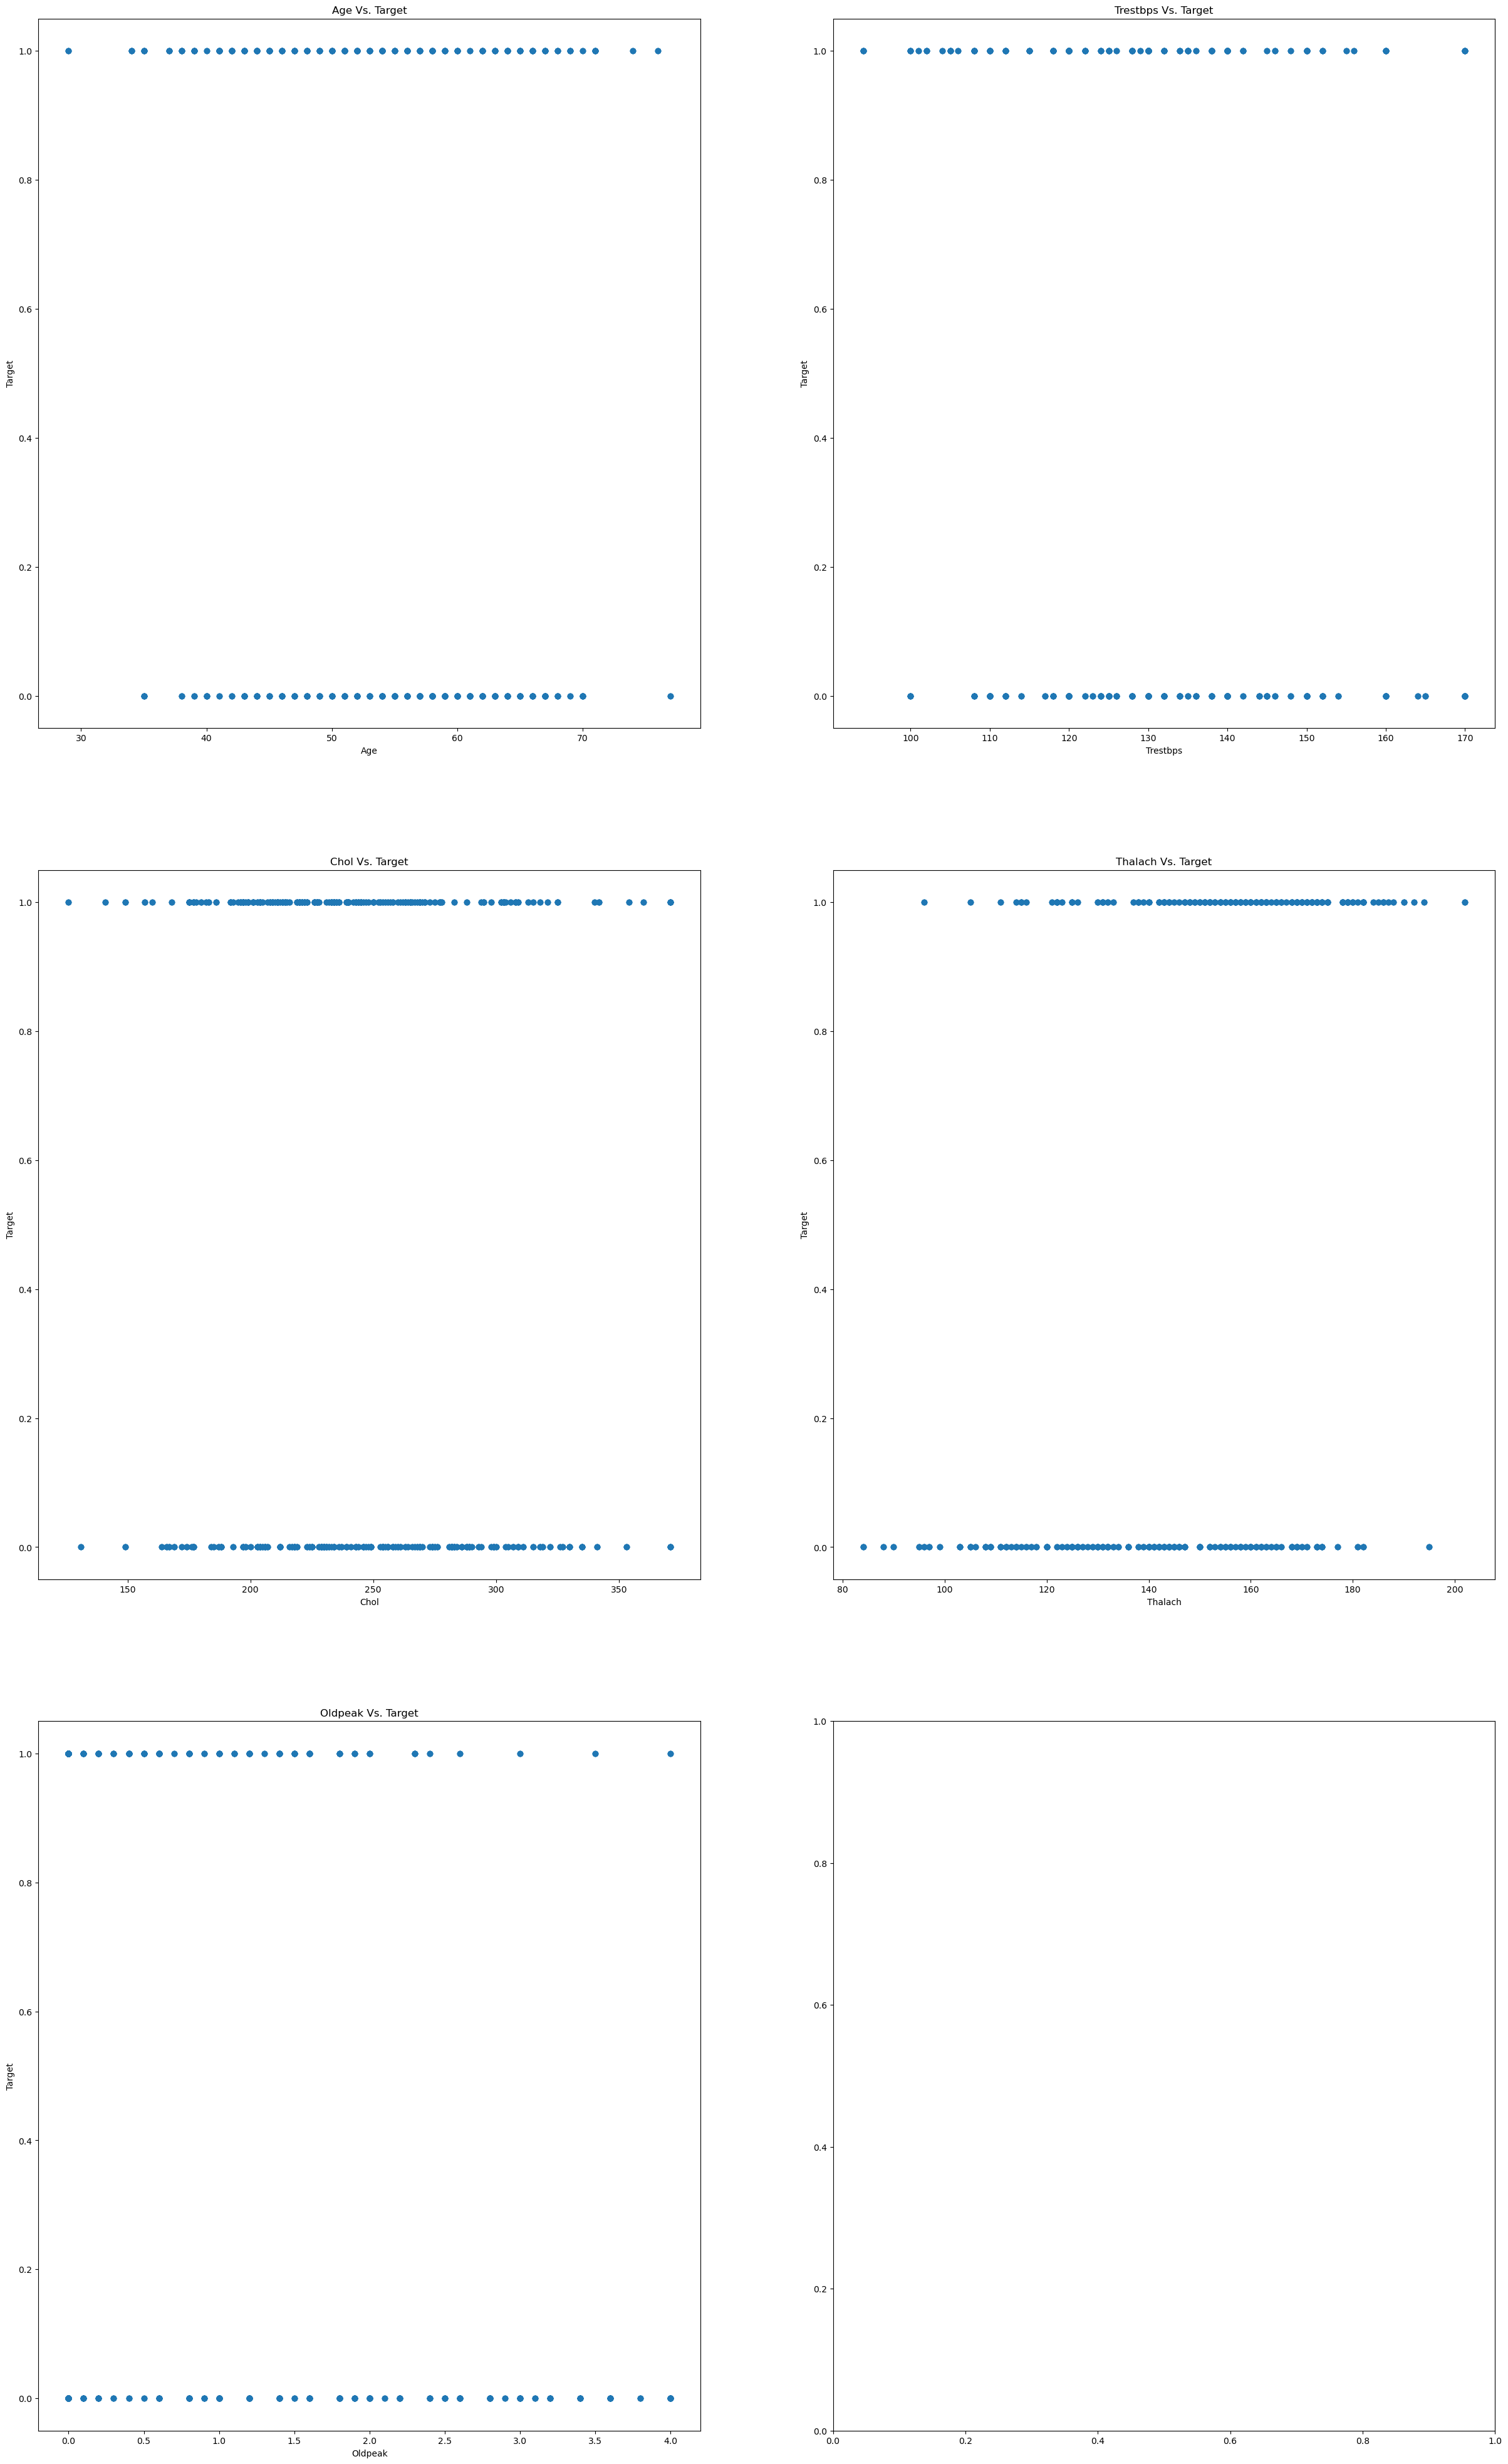

In [45]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].scatter(dataset['age'], dataset['target'])
axes[0,0].set_title("Age Vs. Target")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Target")

#scatter plot of radius and texture
axes[0,1].scatter(dataset['trestbps'], dataset['target'])
axes[0,1].set_title("Trestbps Vs. Target")
axes[0,1].set_xlabel("Trestbps")
axes[0,1].set_ylabel("Target")

#scatter plot of radius and smoothness
axes[1,0].scatter(dataset['chol'], dataset['target'])
axes[1,0].set_title("Chol Vs. Target")
axes[1,0].set_xlabel("Chol")
axes[1,0].set_ylabel("Target")

#scatter plot of radius and concavity 
axes[1,1].scatter(dataset['thalach'], dataset['target']);
axes[1,1].set_title("Thalach Vs. Target");
axes[1,1].set_xlabel("Thalach")
axes[1,1].set_ylabel("Target")

axes[2,0].scatter(dataset['oldpeak'], dataset['target']);
axes[2,0].set_title("Oldpeak Vs. Target");
axes[2,0].set_xlabel("Oldpeak")
axes[2,0].set_ylabel("Target")

(0.0, 4.0)

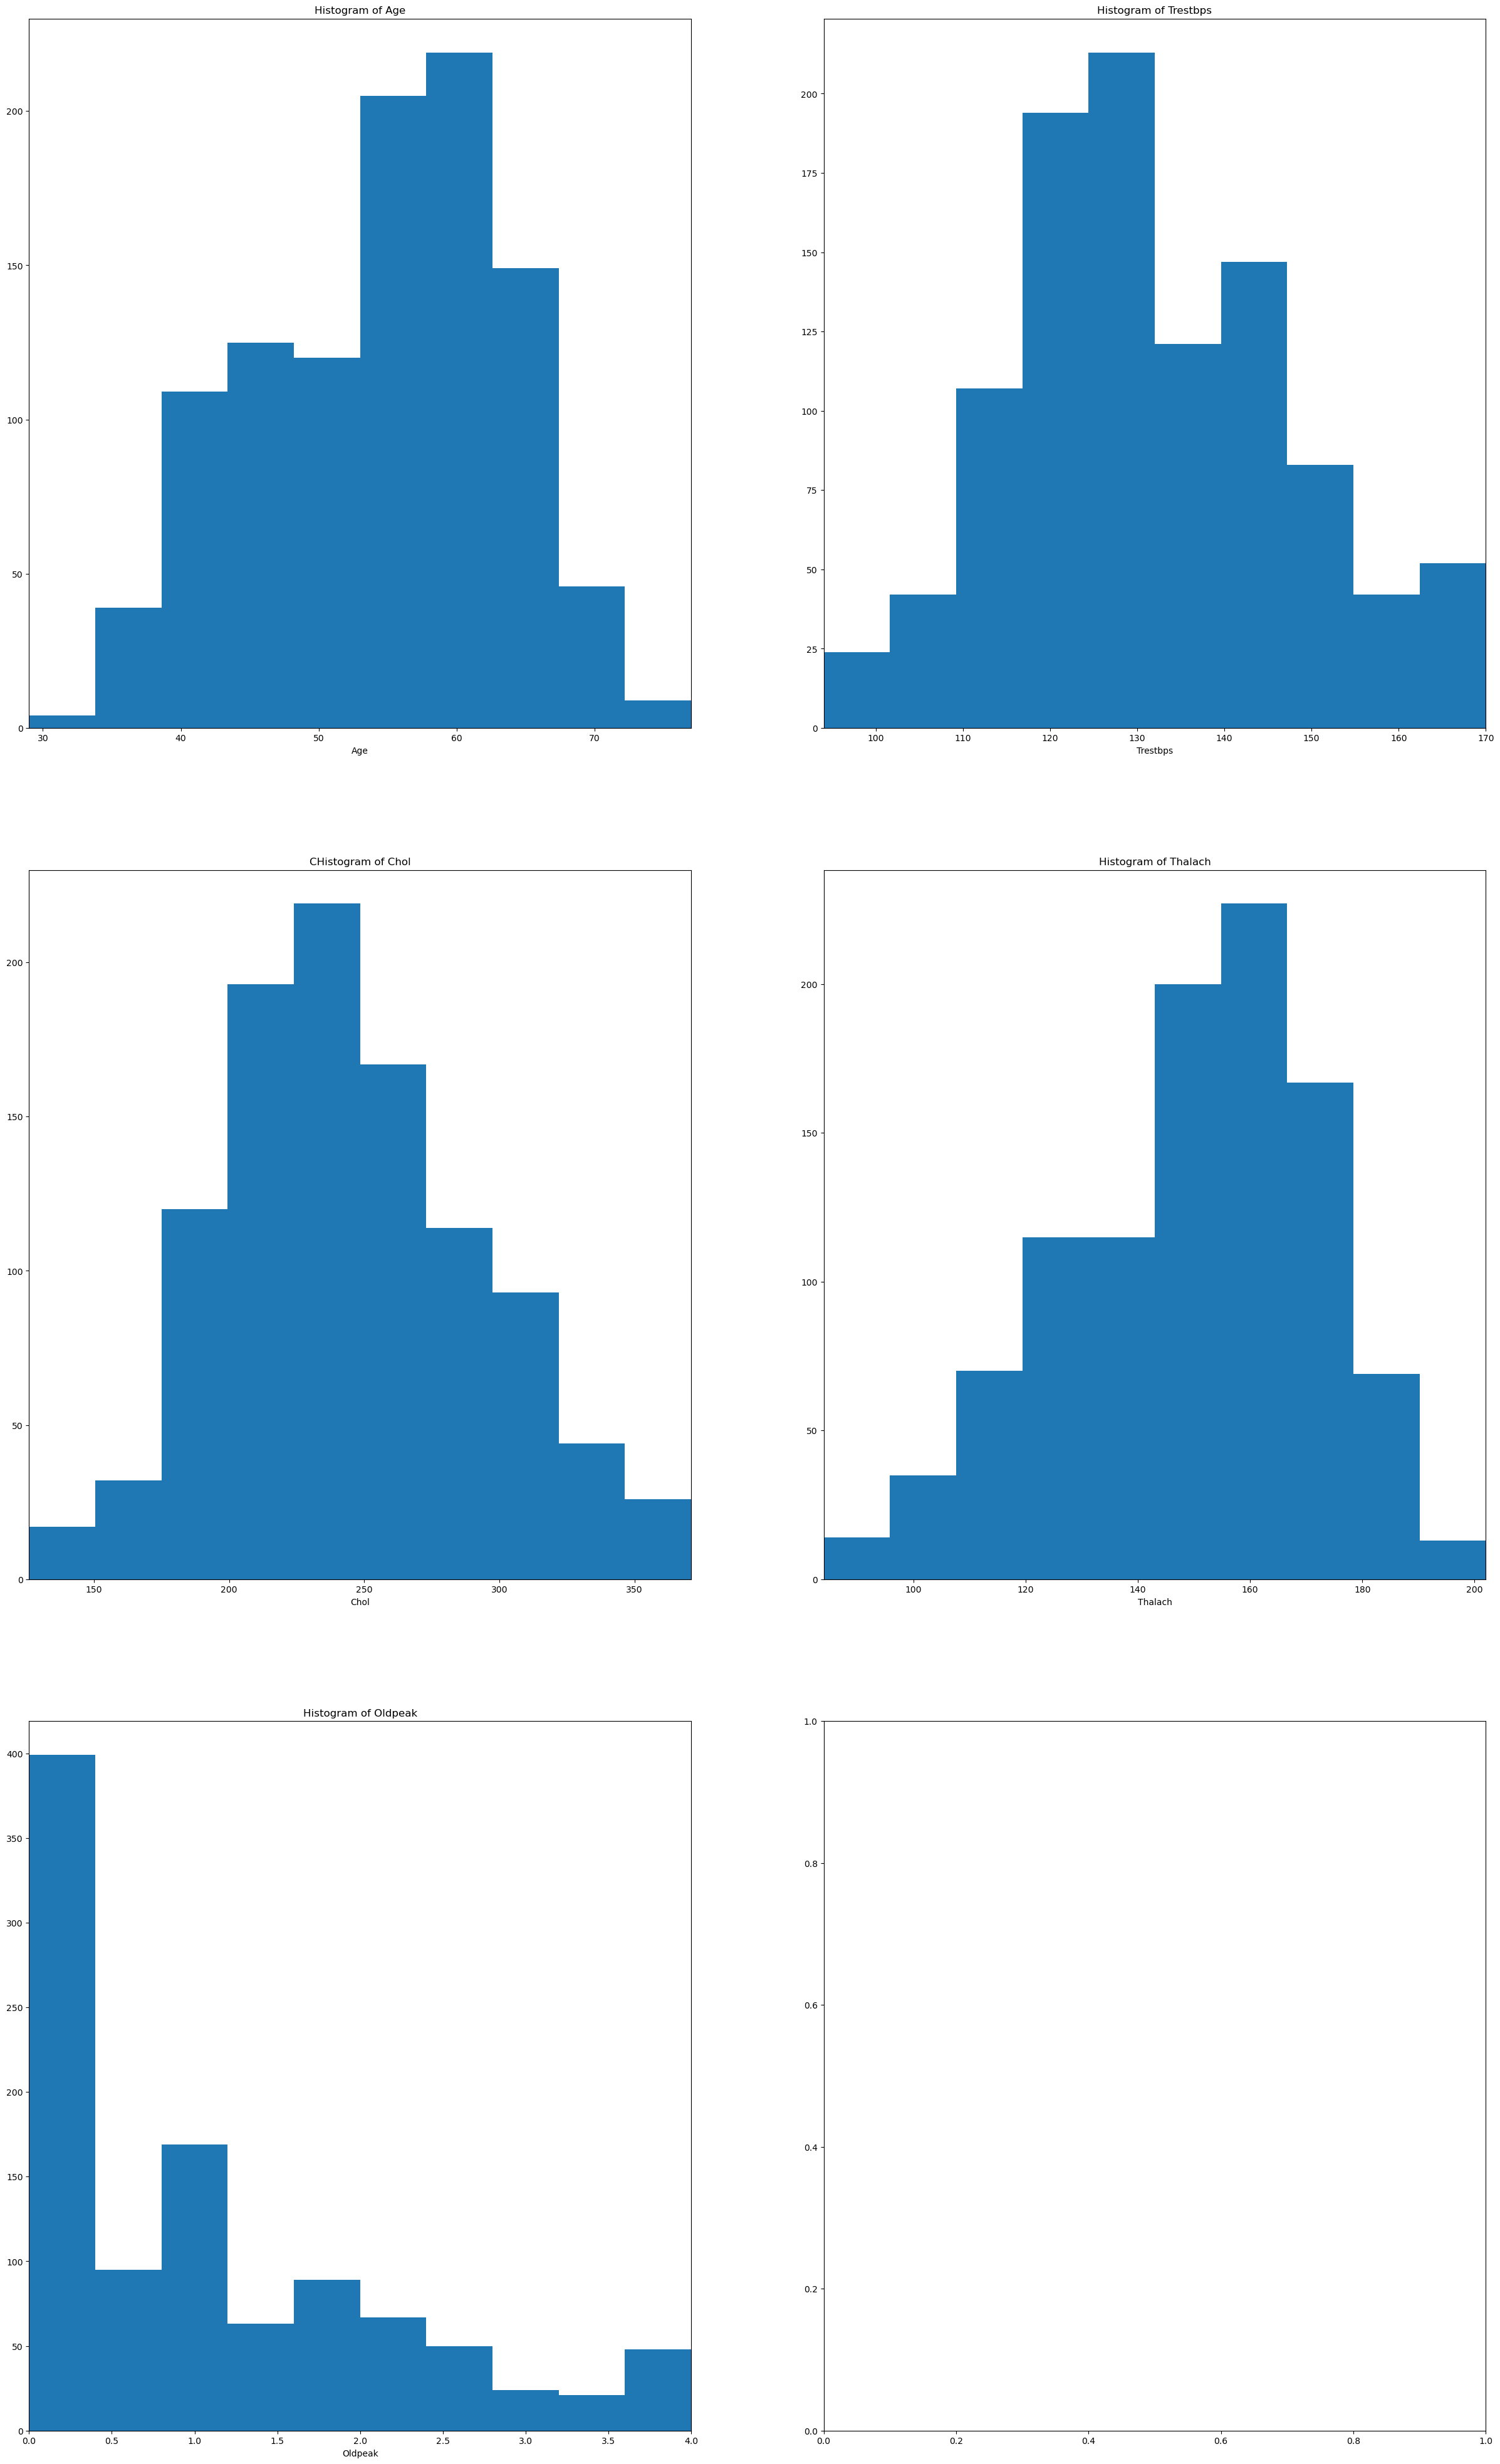

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(30,50))

#scatter plot of radius and compactness
axes[0,0].hist(dataset['age'])
axes[0,0].set_title("Histogram of Age")
axes[0,0].set_xlabel("Age")
axes[0,0].set_xlim((min(dataset.age), max(dataset.age)))

#scatter plot of radius and texture
axes[0,1].hist(dataset['trestbps'])
axes[0,1].set_title("Histogram of Trestbps")
axes[0,1].set_xlabel("Trestbps")
axes[0,1].set_xlim((min(dataset.trestbps), max(dataset.trestbps)))

#scatter plot of radius and smoothness
axes[1,0].hist(dataset['chol'])
axes[1,0].set_title("CHistogram of Chol")
axes[1,0].set_xlabel("Chol")
axes[1,0].set_xlim((min(dataset.chol), max(dataset.chol)))

#scatter plot of radius and concavity 
axes[1,1].hist(dataset['thalach']);
axes[1,1].set_title("Histogram of Thalach");
axes[1,1].set_xlabel("Thalach")
axes[1,1].set_xlim((min(dataset.thalach), max(dataset.thalach)))

axes[2,0].hist(dataset['oldpeak']);
axes[2,0].set_title("Histogram of Oldpeak");
axes[2,0].set_xlabel("Oldpeak")
axes[2,0].set_xlim((min(dataset.oldpeak), max(dataset.oldpeak)))

In [47]:
cv = dataset.std()/dataset.mean()
cv

age         0.166665
sex         0.661827
cp          1.092528
trestbps    0.125950
chol        0.194897
fbs         2.388496
restecg     0.996454
thalach     0.153166
exang       1.404614
oldpeak     1.065022
slope       0.445915
ca          1.366840
thal        0.267077
target      0.974472
dtype: float64

In [48]:
dataset.skew()

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.402284
chol        0.343813
fbs         1.971339
restecg     0.180440
thalach    -0.465409
exang       0.692655
oldpeak     0.954009
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

In [49]:
#correlation matrix
dataset.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.278179  0.213481  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.067713 -0.181965  0.027200   
cp       -0.071966 -0.041119  1.000000  0.047868 -0.097159  0.079294   
trestbps  0.278179 -0.067713  0.047868  1.000000  0.135275  0.170346   
chol      0.213481 -0.181965 -0.097159  0.135275  1.000000  0.030109   
fbs       0.121243  0.027200  0.079294  0.170346  0.030109  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.127729 -0.137856 -0.104051   
thalach  -0.389859 -0.048239  0.306936 -0.044431 -0.031885 -0.009858   
exang     0.088163  0.139157 -0.401513  0.046996  0.083081  0.049261   
oldpeak   0.211706  0.091850 -0.171507  0.172785  0.068811  0.017088   
slope    -0.169105 -0.026666  0.131633 -0.110336 -0.006644 -0.061902   
ca        0.271551  0.111729 -0.176206  0.105135  0.080030  0.137156   
thal      0.072297  0.198424 -0.163341  0.047446  0.091881 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.132301 -0.118254 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.389859  0.088163  0.211706 -0.169105  0.271551   
sex      -0.055117 -0.048239  0.139157  0.091850 -0.026666  0.111729   
cp        0.043581  0.306936 -0.401513 -0.171507  0.131633 -0.176206   
trestbps -0.127729 -0.044431  0.046996  0.172785 -0.110336  0.105135   
chol     -0.137856 -0.031885  0.083081  0.068811 -0.006644  0.080030   
fbs      -0.104051 -0.009858  0.049261  0.017088 -0.061902  0.137156   
restecg   1.000000  0.050727 -0.065606 -0.055364  0.086086 -0.078072   
thalach   0.050727  1.000000 -0.384504 -0.356516  0.396667 -0.210958   
exang    -0.065606 -0.384504  1.000000  0.321652 -0.267335  0.107849   
oldpeak  -0.055364 -0.356516  0.321652  1.000000 -0.570983  0.219533   
slope     0.086086  0.396667 -0.267335 -0.570983  1.000000 -0.073440   
ca       -0.078072 -0.210958  0.107849  0.219533 -0.073440  1.000000   
thal     -0.020504 -0.099909  0.197201  0.201266 -0.094090  0.149014   
target    0.134468  0.423552 -0.438029 -0.445007  0.345512 -0.382085   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.047446 -0.132301  
chol      0.091881 -0.118254  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.099909  0.423552  
exang     0.197201 -0.438029  
oldpeak   0.201266 -0.445007  
slope    -0.094090  0.345512  
ca        0.149014 -0.382085  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

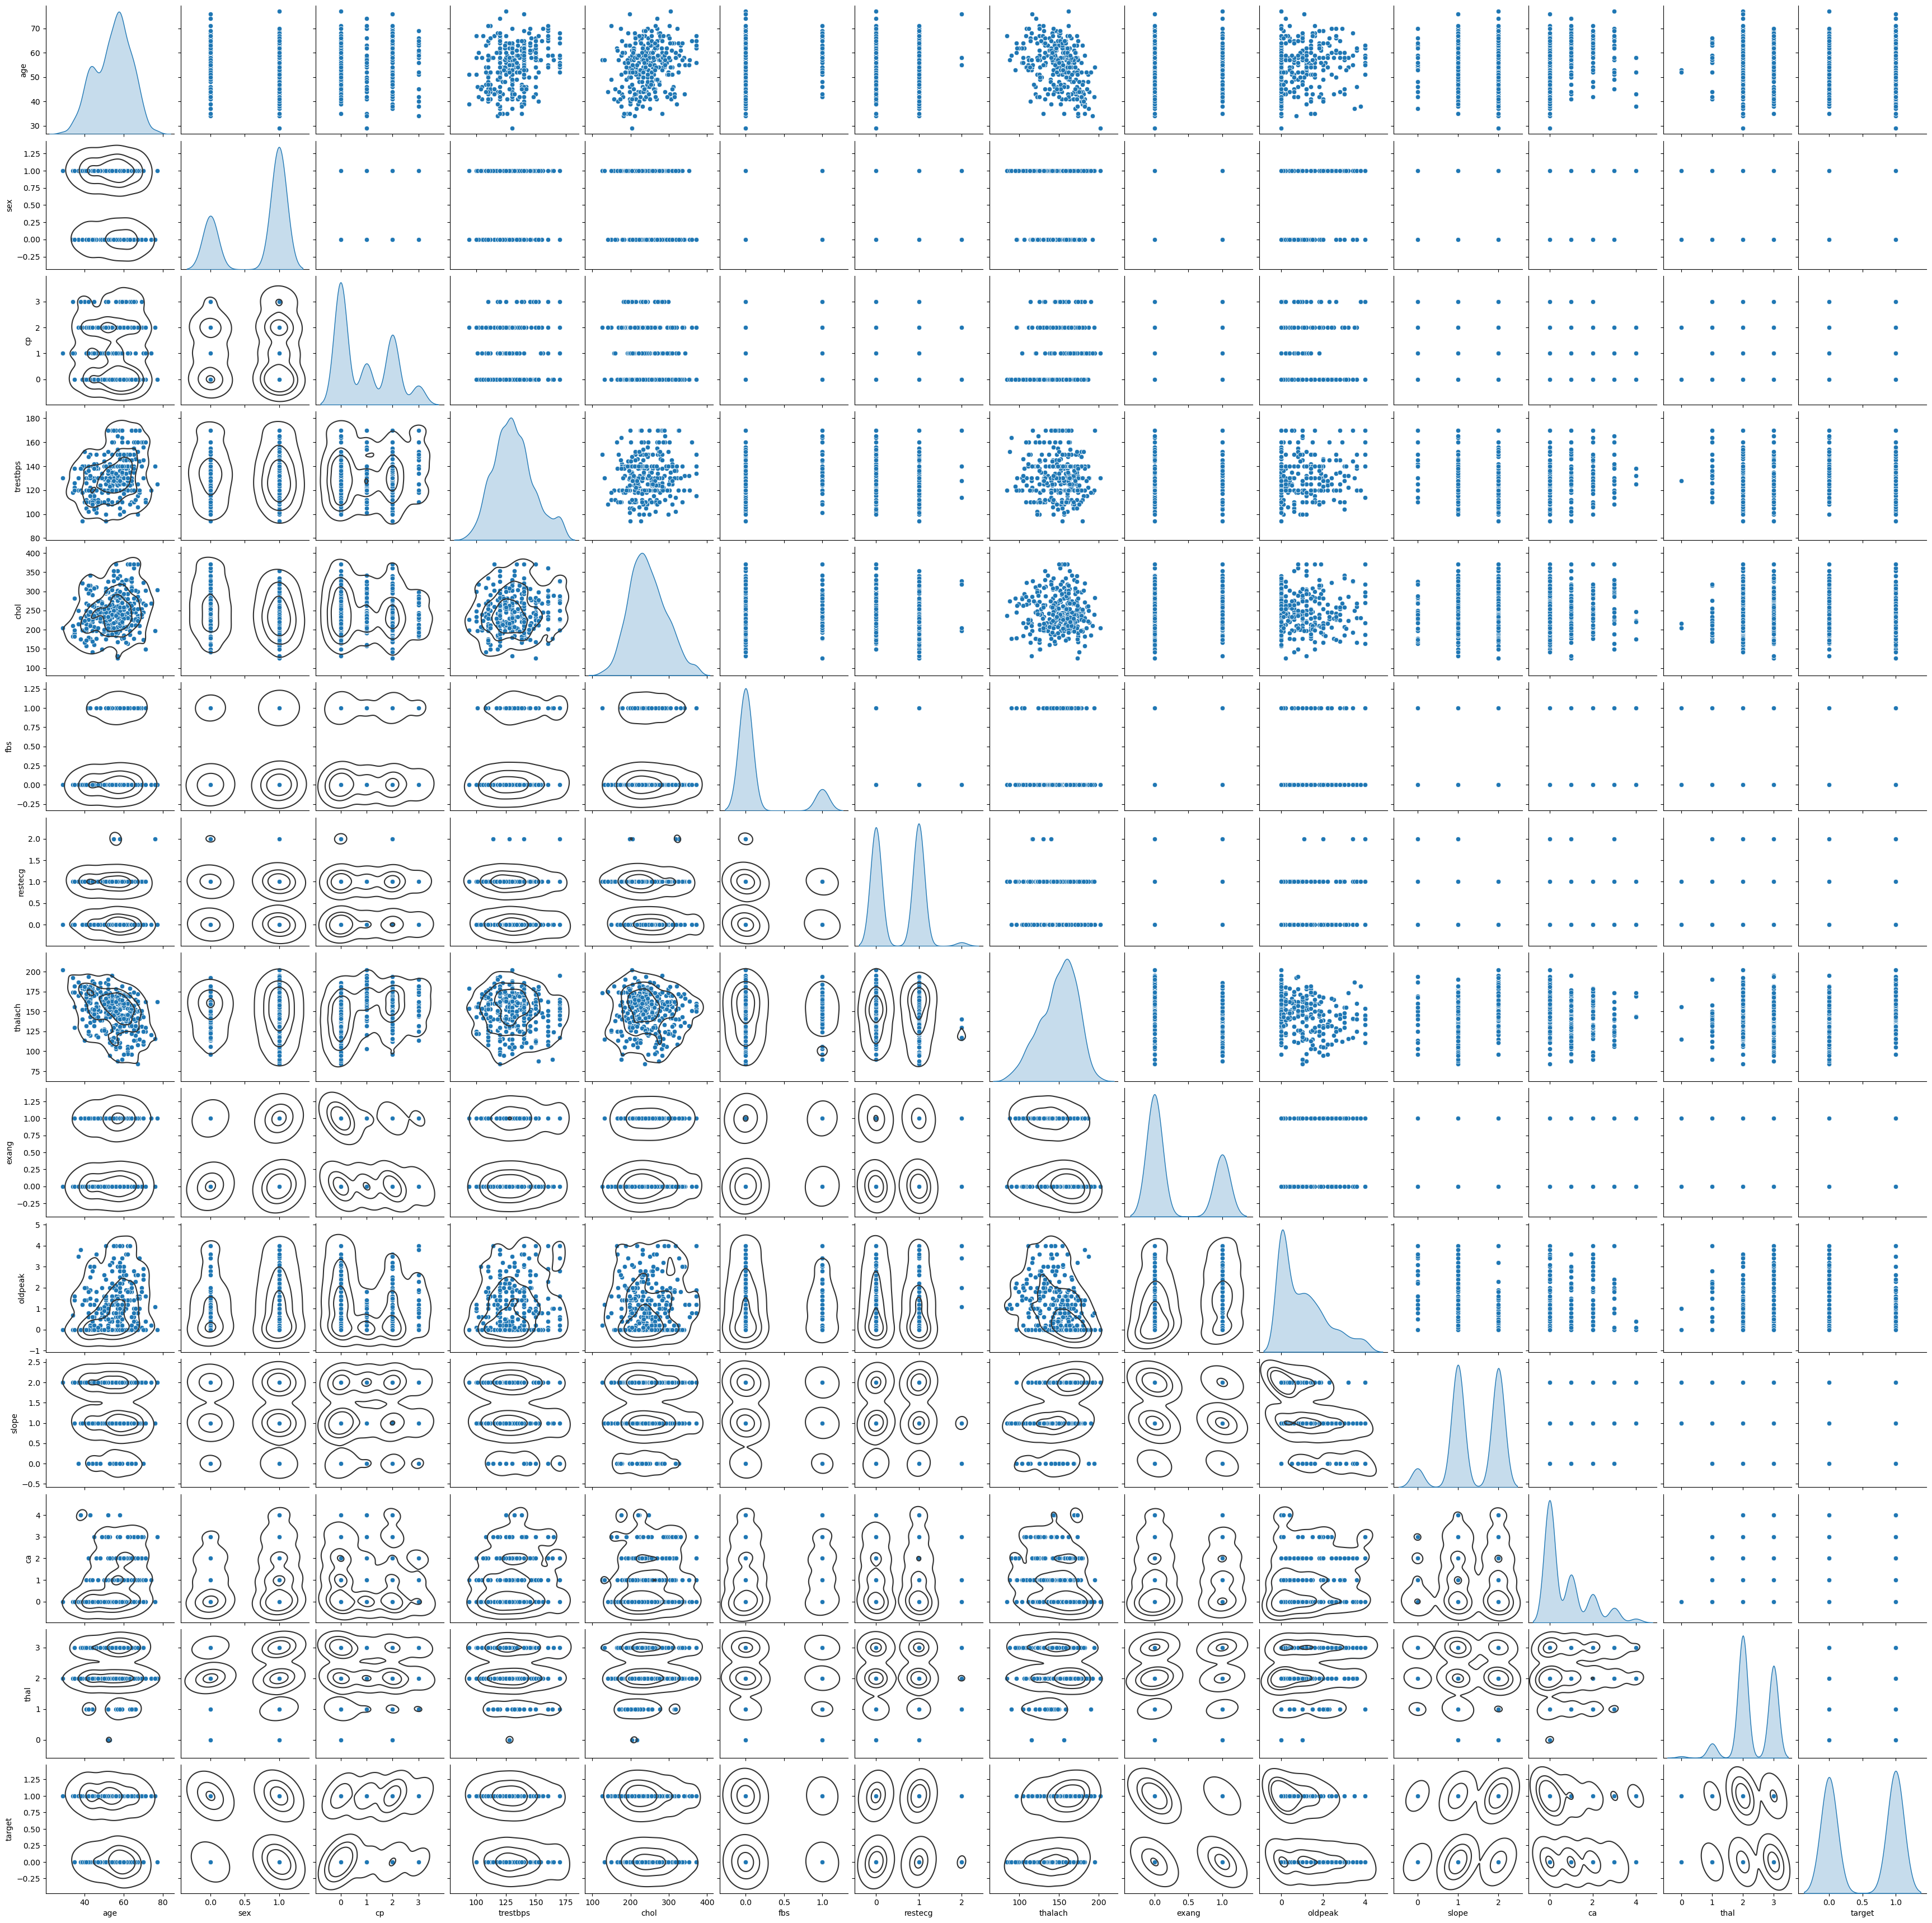

In [50]:
g = sns.pairplot(dataset, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

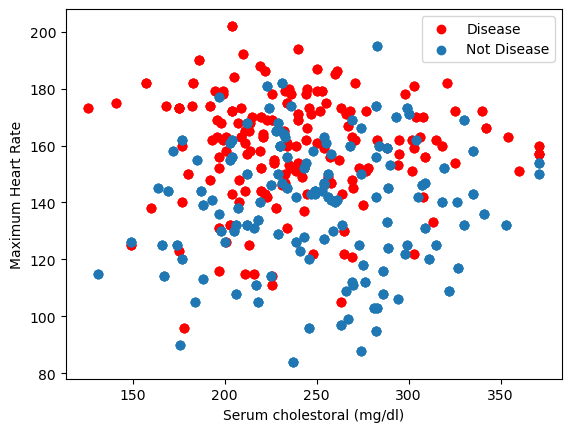

In [52]:
plt.scatter(x=dataset.chol[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.chol[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Serum cholestoral (mg/dl)")
plt.ylabel("Maximum Heart Rate")
plt.show()

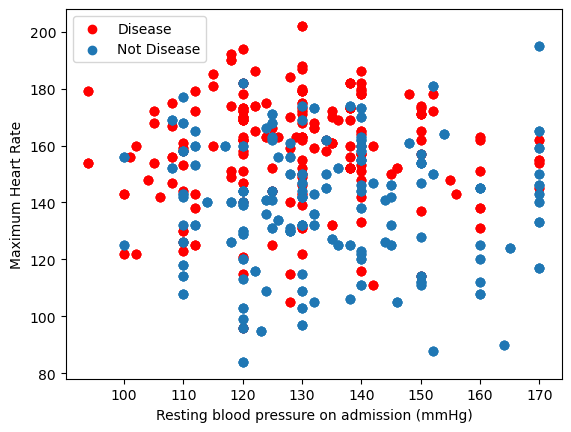

In [53]:
plt.scatter(x=dataset.trestbps[(dataset.target==1)], y=dataset.thalach[dataset.target==1], c="red")
plt.scatter(x=dataset.trestbps[(dataset.target==0)], y=dataset.thalach[dataset.target==0])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Resting blood pressure on admission (mmHg)")
plt.ylabel("Maximum Heart Rate")
plt.show()

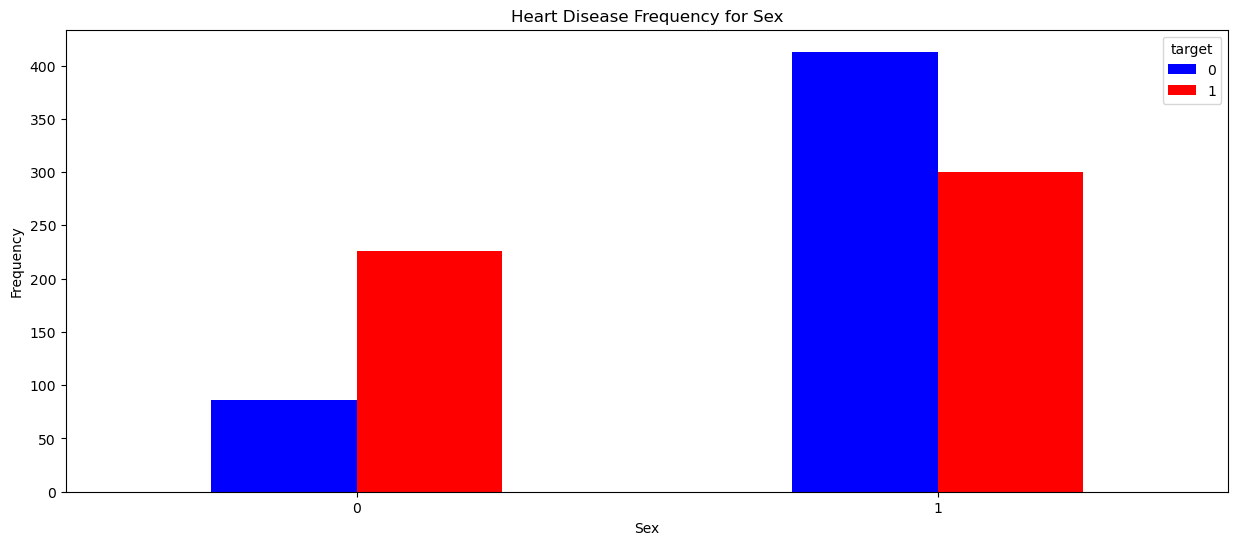

In [54]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=["blue","red"])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

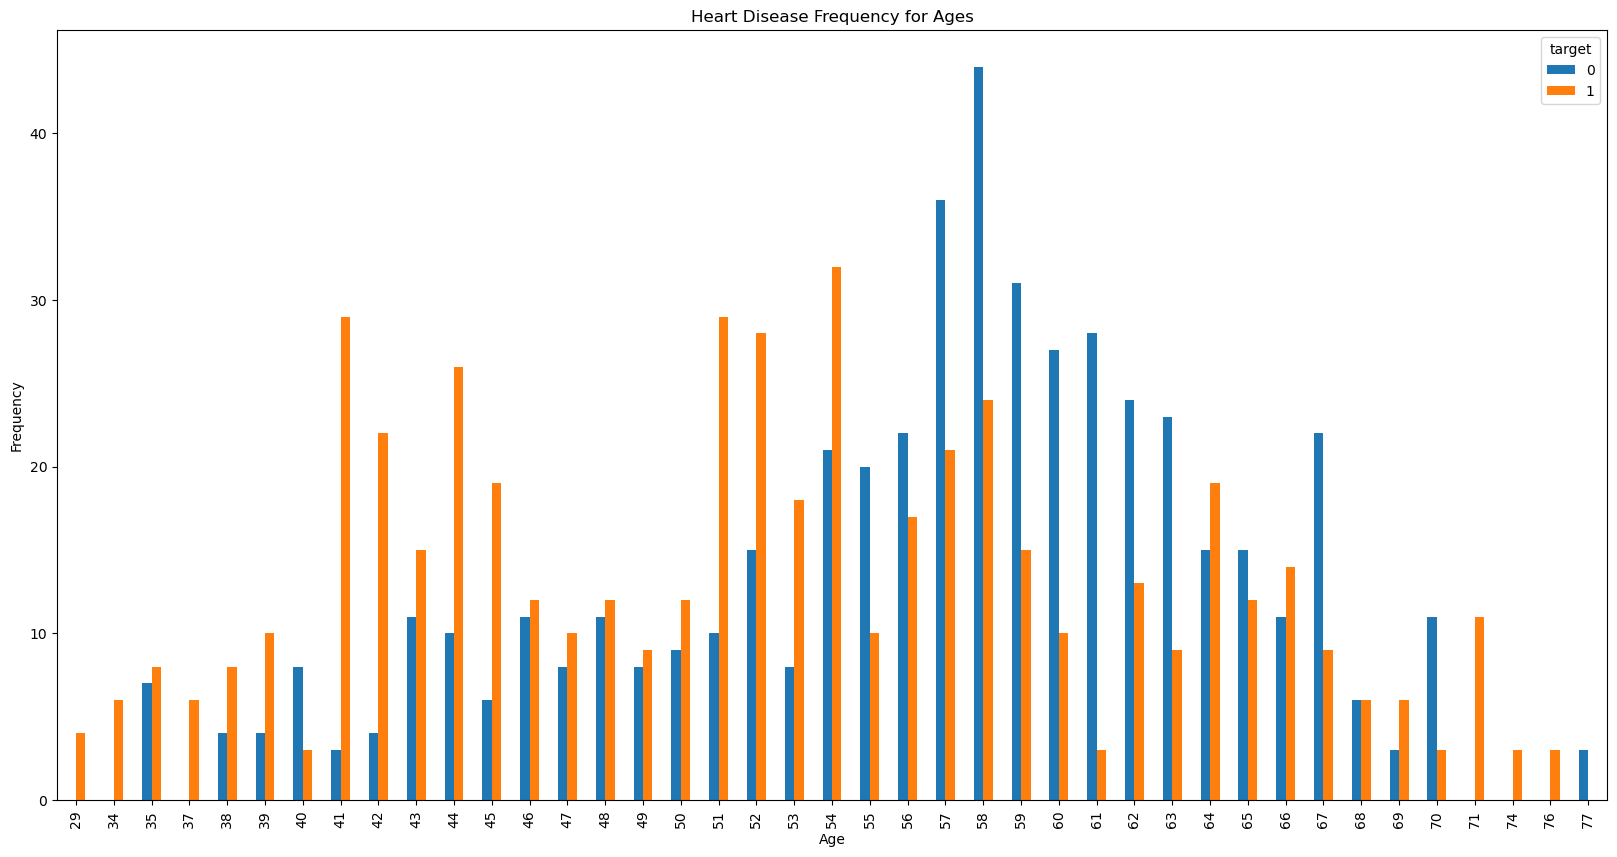

In [55]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [56]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['age']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

ModuleNotFoundError: No module named 'reliability'

In [57]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['trestbps']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

ModuleNotFoundError: No module named 'reliability'

In [58]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['chol']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

ModuleNotFoundError: No module named 'reliability'

In [59]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['thalach']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

ModuleNotFoundError: No module named 'reliability'

In [60]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=np.array(dataset['oldpeak']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

ModuleNotFoundError: No module named 'reliability'

In [61]:
dataset2.columns


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#split dataset to train and test 
feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],

#split train and test for decision tree model 80/20 split
y = dataset2["target"]
x = dataset2.drop(["target"],axis=1).values
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=0)

xtrainknn = scaler.fit_transform(xtrain)
xtestknn = scaler.transform(xtest)

In [63]:
xtrainknn


array([[0.27083333, 0.71052632, 0.48163265, ..., 0.        , 1.        ,
        0.        ],
       [0.77083333, 0.68421053, 0.62040816, ..., 0.        , 1.        ,
        0.        ],
       [0.5       , 0.47368421, 0.48979592, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.75      , 0.57894737, 0.63673469, ..., 0.        , 1.        ,
        0.        ],
       [0.79166667, 0.34210526, 0.45306122, ..., 0.        , 1.        ,
        0.        ],
       [0.64583333, 0.60526316, 0.24081633, ..., 0.        , 1.        ,
        0.        ]])

In [64]:
xtestknn


array([[0.3125    , 0.47368421, 0.43673469, ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 0.55263158, 0.7877551 , ..., 0.        , 1.        ,
        0.        ],
       [0.70833333, 0.60526316, 0.24897959, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29166667, 0.36842105, 0.35510204, ..., 0.        , 1.        ,
        0.        ],
       [0.77083333, 1.        , 0.41632653, ..., 0.        , 0.        ,
        1.        ],
       [0.875     , 0.23684211, 0.09387755, ..., 0.        , 1.        ,
        0.        ]])

In [65]:
xtrain 

array([[42, 148, 244, ..., False, True, False],
       [66, 146, 278, ..., False, True, False],
       [53, 130, 246, ..., False, True, False],
       ...,
       [65, 138, 282, ..., False, True, False],
       [67, 120, 237, ..., False, True, False],
       [60, 140, 185, ..., False, True, False]], dtype=object)

In [66]:
xtrain 

array([[42, 148, 244, ..., False, True, False],
       [66, 146, 278, ..., False, True, False],
       [53, 130, 246, ..., False, True, False],
       ...,
       [65, 138, 282, ..., False, True, False],
       [67, 120, 237, ..., False, True, False],
       [60, 140, 185, ..., False, True, False]], dtype=object)

In [67]:
#suggested number of neighbours 
import math  
math.sqrt(301)

17.349351572897472

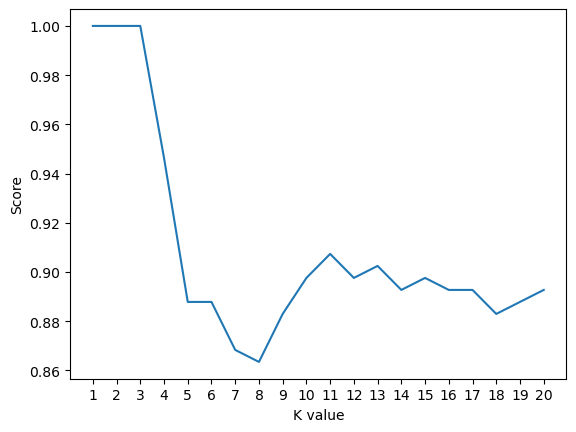

Maximum KNN Score is 100.00%
K Value with highest score:  1


In [68]:
#to determine optimum number of neighbours
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(xtrainknn, ytrain)
    scoreList.append(knn2.score(xtestknn, ytest))
    
plt.plot(range(1,21), scoreList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

In [69]:
#modeling KNN 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xtrainknn, ytrain)

KNeighborsClassifier(n_neighbors=10)

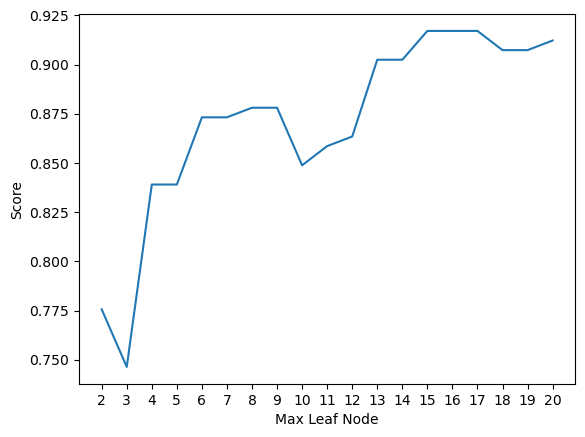

Maximum Max Leaf Node Score is 91.71%
Max Leaf Node with highest score:  14


In [70]:
#to determine optimum number of maximum leaf nodes 
scoreList = []
for i in range(2,21):
    dt2 = DecisionTreeClassifier(max_leaf_nodes = i)  # n_neighbors means k
    dt2.fit(xtrain, ytrain)
    scoreList.append(dt2.score(xtest, ytest))
    
plt.plot(range(2,21), scoreList)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum Max Leaf Node Score is {:.2f}%".format(acc))
print("Max Leaf Node with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

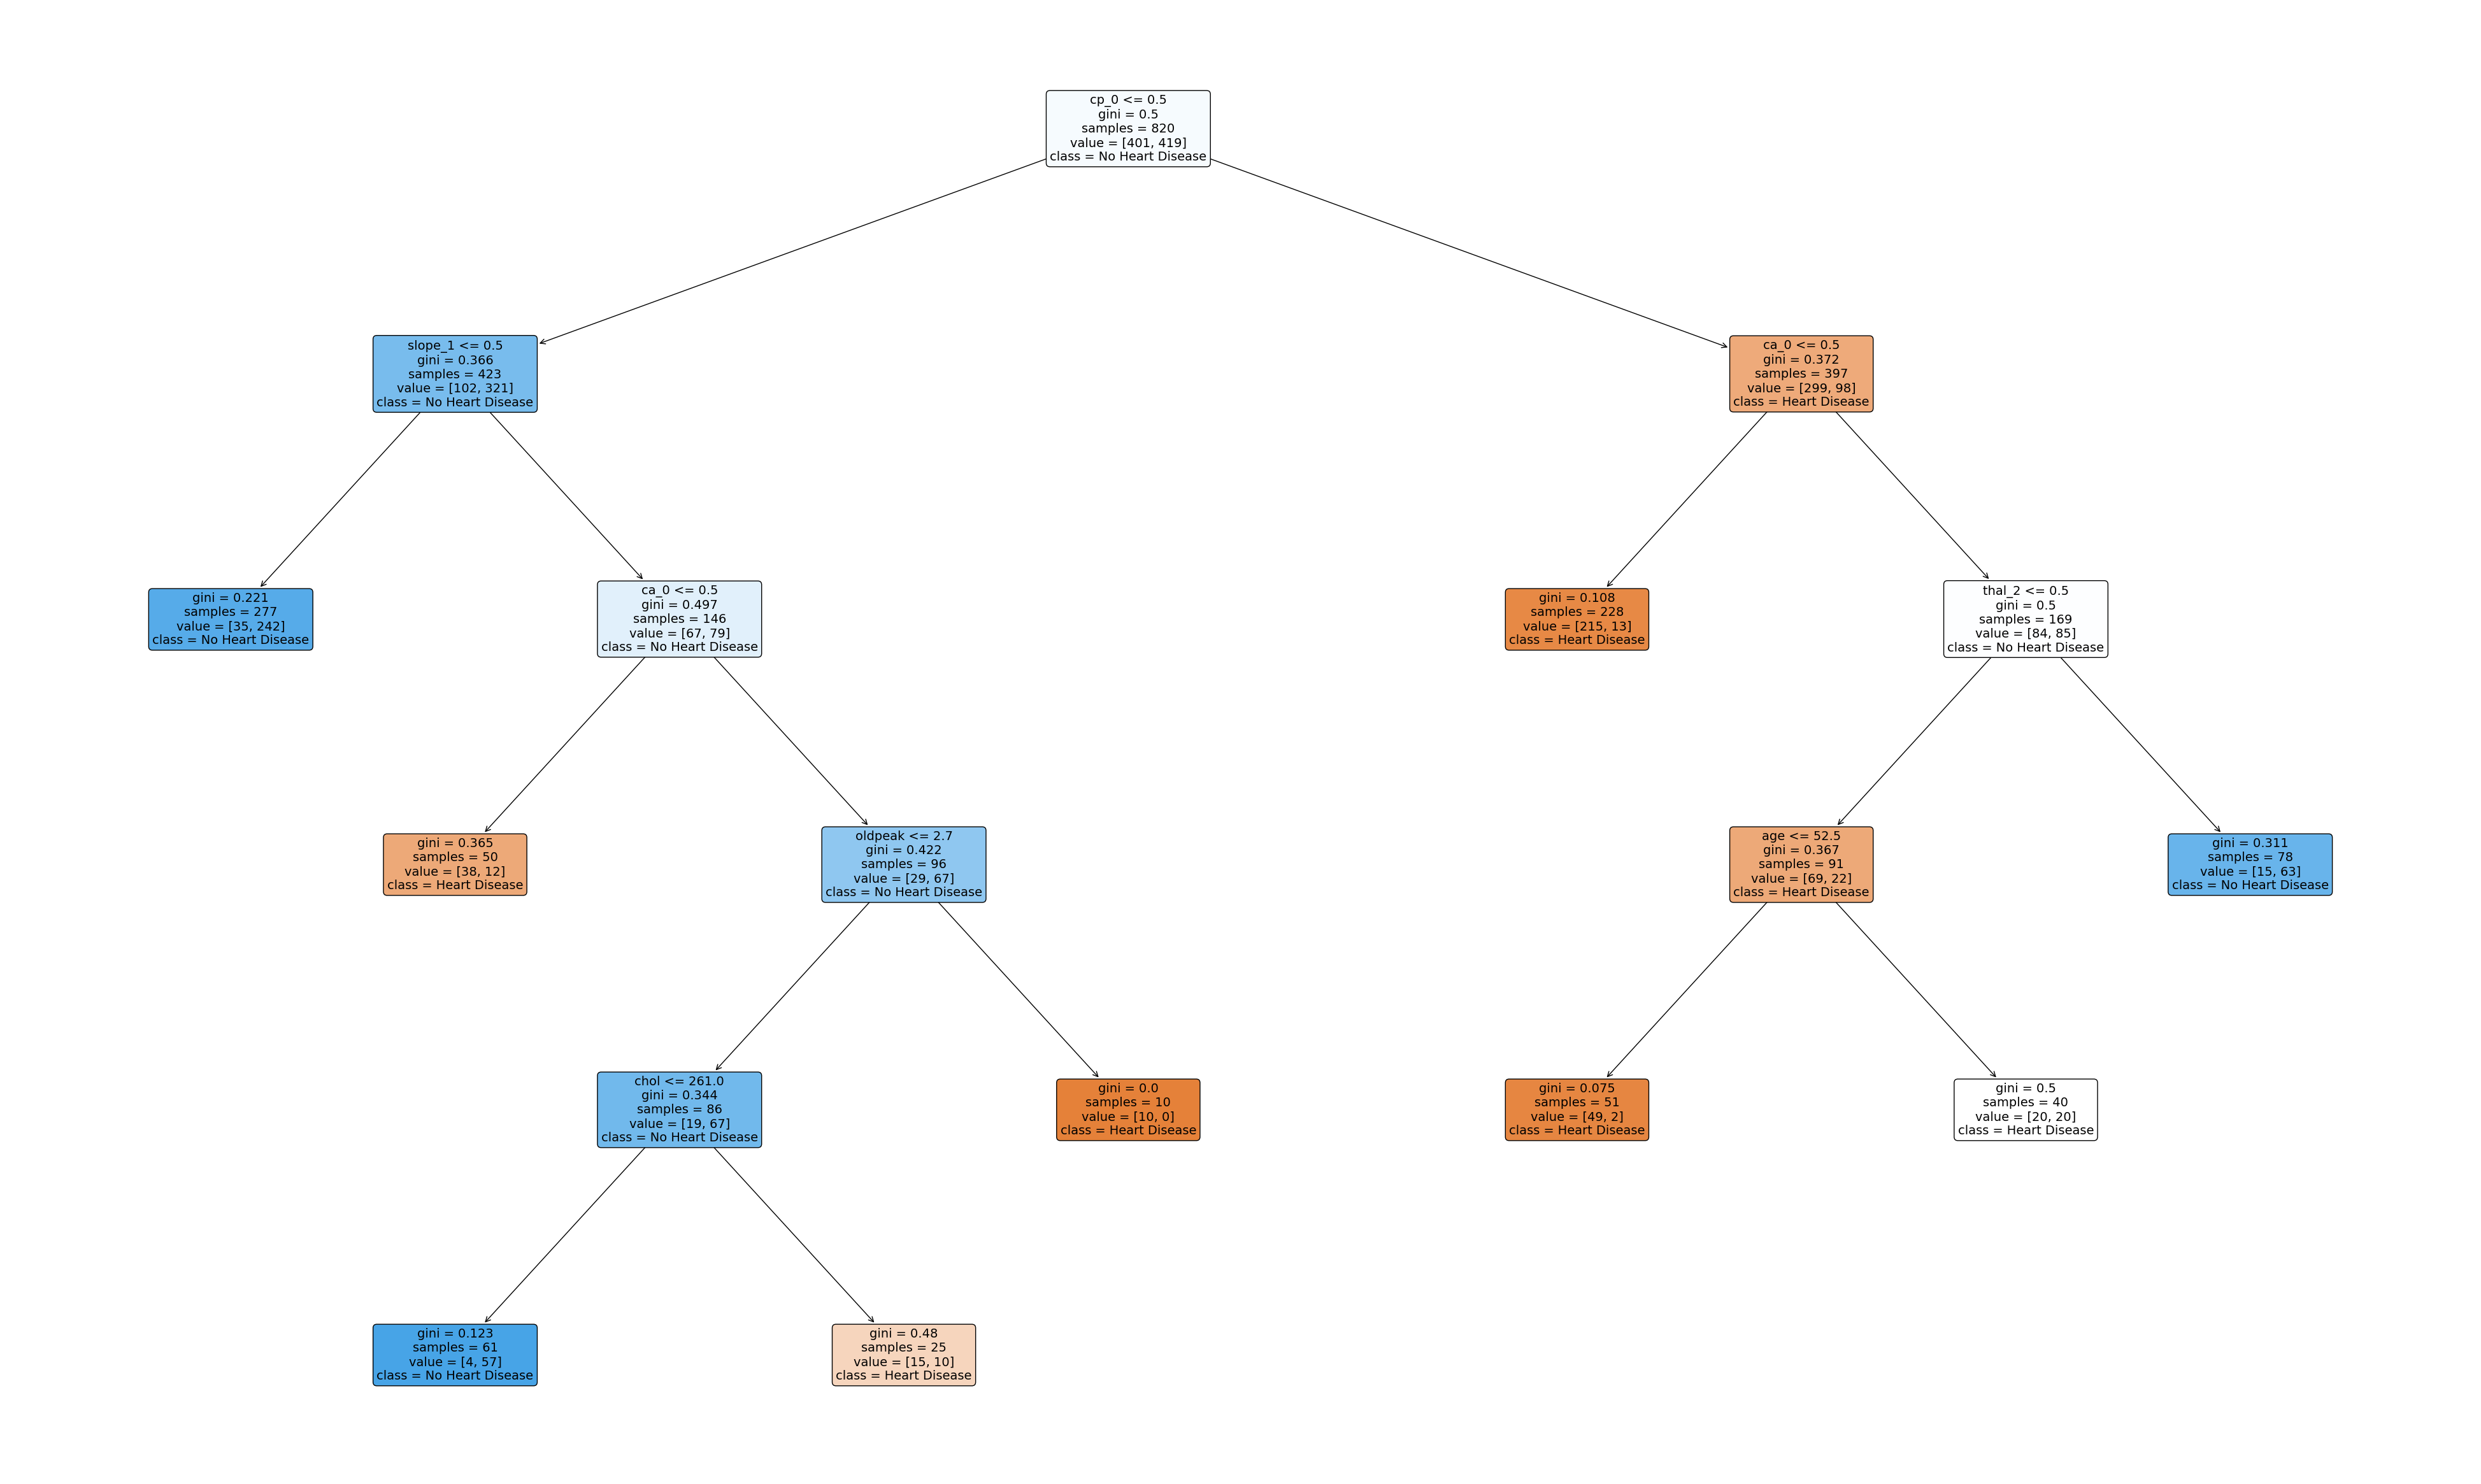

In [71]:
DT = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
#since max leaf node of 6 to 9 has the same scores, thus, 9 is used for better accuracy. 
DT = DT.fit(xtrain,ytrain)
plt.figure(figsize=(50,30))
a = plot_tree(DT, 
              feature_names=list(dataset2.drop(["target"], axis=1)), 
              class_names=["Heart Disease","No Heart Disease"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [72]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

In [76]:
#validate model by using test set to predict 
dt_pred = DT.predict(xtest)
knn_pred = knn.predict(xtestknn)
nb_pred = nb.predict(xtest)

In [77]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#knn
print("Accuracy of KNN: ", accuracy_score(ytest, knn_pred) )
print("F1 Score of KNN: ", f1_score(ytest, knn_pred) )
knncm = confusion_matrix(ytest, knn_pred)

Accuracy of KNN:  0.8975609756097561
F1 Score of KNN:  0.9023255813953489


<Axes: >

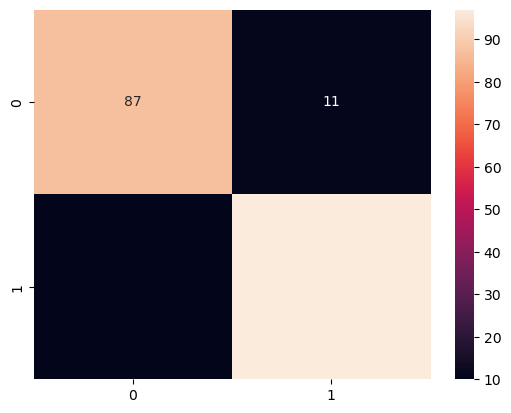

In [78]:
sns.heatmap(knncm, annot=True)

In [79]:
#decision tree
print("Accuracy of Decision Tree: ", accuracy_score(ytest, dt_pred) )
print("F1 Score of Decision Tree: ", f1_score(ytest, dt_pred) )
dtcm = confusion_matrix(ytest, dt_pred)

Accuracy of Decision Tree:  0.8780487804878049
F1 Score of Decision Tree:  0.883720930232558


<Axes: >

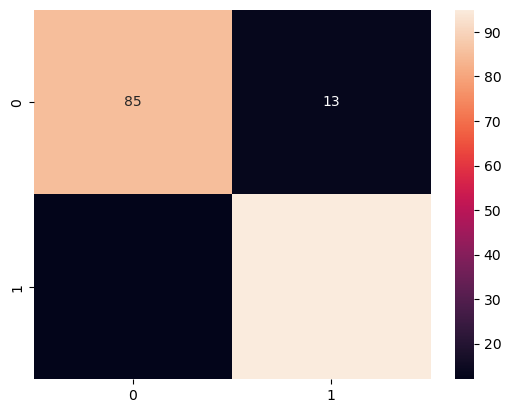

In [80]:
sns.heatmap(dtcm, annot=True)


In [81]:
#nb
print("Accuracy of Naive Bayes: ", accuracy_score(ytest, nb_pred) )
print("F1 Score of Naive Bayes: ", f1_score(ytest, nb_pred) )
nbcm = confusion_matrix(ytest, nb_pred)

Accuracy of Naive Bayes:  0.8682926829268293
F1 Score of Naive Bayes:  0.88


<Axes: >

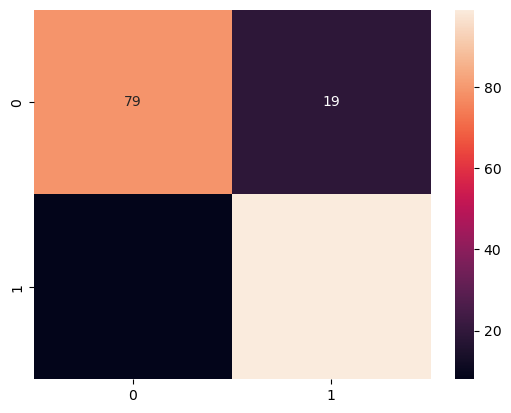

In [82]:
sns.heatmap(nbcm, annot=True)


In [83]:
data1 = [[55,140,250,160,2.5, 
        0, 1, 
        0,0,0,1,
        0,1,
        0,0,1,
        0,1,
        0,1,0,
        1,0,0,0,0,
        1,0,0,0]]

DF = pd.DataFrame(data,columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 
                                  'sex_0', 'sex_1', 
                                  'cp_0', 'cp_1', 'cp_2', 'cp_3', 
                                  'fbs_0', 'fbs_1', 
                                  'restecg_0', 'restecg_1', 'restecg_2', 
                                  'exang_0', 'exang_1',
                                  'slope_0', 'slope_1', 'slope_2', 
                                  'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 
                                  'thal_0', 'thal_1', 'thal_2', 'thal_3'])
pred1 = knn.predict(data)
pred1

NameError: name 'data' is not defined